<a href="https://colab.research.google.com/github/Monalidambe2021/MNIST/blob/main/Pra_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the dataset
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)

In [ ]:

from tensorflow.keras.utils import to_categorical

In [ ]:
# Transform the dependent variable in proper one-hotvectors
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [ ]:

#Scaling
X_train = X_train/255
X_test  = X_test/255

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Model building
model = Sequential()
model.add(Dense(50,activation='relu',input_shape=(784,)))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(X_train,y_train,batch_size=64, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3300 - accuracy: 0.9080 - val_loss: 0.1742 - val_accuracy: 0.9482
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1559 - accuracy: 0.9535 - val_loss: 0.1337 - val_accuracy: 0.9602
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1191 - accuracy: 0.9642 - val_loss: 0.1121 - val_accuracy: 0.9665
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0983 - accuracy: 0.9707 - val_loss: 0.1150 - val_accuracy: 0.9659
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0839 - accuracy: 0.9747 - val_loss: 0.1095 - val_accuracy: 0.9690
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0733 - accuracy: 0.9778 - val_loss: 0.0935 - val_accuracy: 0.9730
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0654 - accuracy: 0.9805 - val_loss: 0.1104 - val_accuracy: 0.9683
Epoch 

In [ ]:
import numpy as np

In [ ]:
img0 = np.array(X_train[0:1]).reshape(1,784)

In [ ]:
img0

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
model.predict(img0).argmax()

5

In [ ]:
 y_train[0].argmax()

5

In [ ]:
 def recognise(img):
    img = np.array(img).reshape(1,784)
    return model.predict(img).argmax()

In [ ]:
# make prediction 
 y_pre = model.predict(X_test).argmax(axis=1)

In [ ]:
 y_pre

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
len(y_pre)

10000

In [ ]:
 y_test.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
 sum(y_pre==y_test.argmax(axis=1))

9730

In [ ]:
# Model Score
9730/10000

0.973

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X_test.shape

(10000, 784)

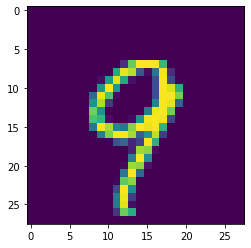

In [ ]:
 plt.imshow(np.array(X_test[560:561]).reshape(28,28))

In [ ]:
 recognise(X_test[560:561])

9